Zhang Chao, 2025.04.25<br>

In [1]:
import pandas as pd
import numpy as np
import xarray as xr
import regionmask
import matplotlib.pyplot as plt
import geopandas as gpd
import os
import sys
import scipy
from matplotlib.colors import Normalize
import cartopy.io.shapereader as shpreader
import matplotlib.colors as mcolors
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '../../')))
from utils import getSigFlag, stats_regionmean
sys.path.append('/home/climate/chaoz/code/utils/')
from plot_utils import plot_settings

In [2]:
os.chdir('/home/climate/chaoz/project/03Irr_Ts_CN/processed/')

dT_LE = xr.open_dataset('delta_LSTle_Yr_CN_2001_2020_PMLv2.nc')
dT_HE = xr.open_dataset('delta_LSThe_Yr_CN_2001_2020_PMLv2.nc')
dT_SW = xr.open_dataset('delta_LSTsw_Yr_CN_2001_2020_PMLv2.nc')

shp_cn = gpd.read_file('../shapefile/ChinaAll.shp')
shp_nanhai = gpd.read_file('../shapefile/Nanhai.shp')
shp_climzone = gpd.read_file('../shapefile/ClimateZone_3.shp')

In [3]:
df_dT_LE = stats_regionmean(dT_LE,'Ts',shp_climzone)
df_dT_HE = stats_regionmean(dT_HE,'Ts',shp_climzone)
df_dT_SW = stats_regionmean(dT_SW,'Ts',shp_climzone)

In [23]:
def plot_curves(ax,y,color,xticklabels,title):
    x = range(0,y.shape[0])
    ax.plot(x,y,color=color)
    parameter = np.polyfit(x, y, 1)
    f = np.poly1d(parameter)
    r, sig = scipy.stats.pearsonr(x, y)
    ax.plot(x, f(x), ls='--', c=color)
    ax.text(0.10,0.90, "slope = %.2f$^{%s}$" %
             (parameter[0]*10, getSigFlag(sig)),
             transform=ax.transAxes, c= 'k',fontsize=12)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_xticks([4,14],xticklabels)

    ax.set_title(title,pad=10,fontsize=14)

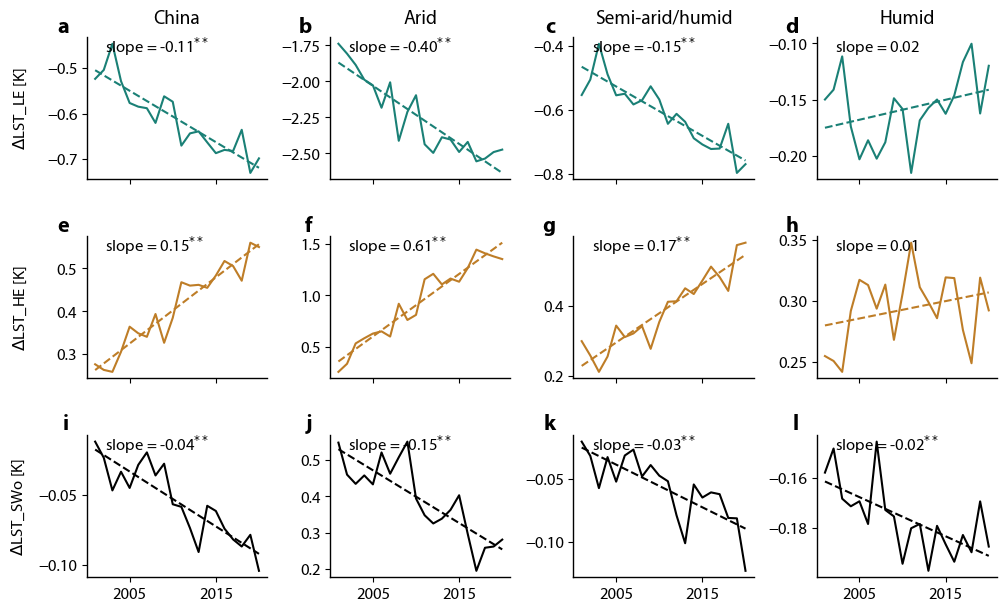

In [26]:
fig, axes = plt.subplots(nrows=3,ncols=4,figsize=(10,6),sharex=True)
plot_settings()
plt.subplots_adjust(left=0.08, right=0.99, top=0.95, bottom=0.05, wspace=0.35, hspace=0.4)#
x = range(0,df_dT_LE.shape[0])
colors = ['#1a8076','#be7d27','k']
titles =['China','Arid','Semi-arid/humid','Humid']
titles2=['','','','']

for i in range(4):
    plot_curves(axes[0,i],df_dT_LE.iloc[:,i+1],colors[0],['',''],titles[i])
    plot_curves(axes[1,i],df_dT_HE.iloc[:,i+1],colors[1],['',''],titles2[i])
    plot_curves(axes[2,i],df_dT_SW.iloc[:,i+1],colors[2],['2005','2015'],titles2[i])

axes[0,0].set_ylabel('$\Delta$LST_LE [K]' ,labelpad=13)
axes[1,0].set_ylabel('$\Delta$LST_HE [K]' ,labelpad=20)
axes[2,0].set_ylabel('$\Delta$LST_SWo [K]',labelpad=8)

panel_labels = [chr(i) for i in range(97, 109)]
for ax, label in zip(axes.flat, panel_labels):
    ax.text(-0.1, 1.15, label, transform=ax.transAxes,
            fontsize=16, fontweight='bold', va='top', ha='right')
    

plt.savefig('../figures/Figure_S08.png',dpi=300)